In [132]:
#import sys
#!{sys.executable} -m pip install matplotlib.pyplot


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from tqdm import tqdm
from astropy.visualization.hist import hist as fancyhist


import pandas
pandas.set_option('display.max_columns', None)


import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [8 , 8]

# Lecture 5

## Generate parameters in log-scale

In [133]:
def precision_round(number, digits=2):
    power = "{:e}".format(number).split('e')[1]
    return round(number, -(int(power) - digits))

### Tau

In [134]:
params = np.logspace(start=np.log10(5), stop=np.log10(30000), num=40)

for i in range(len(params)):
    params[i] = precision_round(params[i])
    
print(''.join(str(num)+', ' for num in params))

5.0, 6.25, 7.81, 9.76, 12.2, 15.3, 19.1, 23.8, 29.8, 37.2, 46.5, 58.2, 72.7, 90.9, 114.0, 142.0, 177.0, 222.0, 277.0, 346.0, 433.0, 541.0, 676.0, 845.0, 1060.0, 1320.0, 1650.0, 2060.0, 2580.0, 3220.0, 4030.0, 5040.0, 6290.0, 7870.0, 9830.0, 12300.0, 15400.0, 19200.0, 24000.0, 30000.0, 


### Age

In [135]:
params = np.logspace(start=np.log10(20), stop=3, num=10)
params = np.append(params, np.arange(1500, 13500, step=500))

for i in range(len(params)):
    params[i] = precision_round(params[i])
    
print(''.join(str(num)+', ' for num in params))

20.0, 30.9, 47.7, 73.7, 114.0, 176.0, 271.0, 419.0, 647.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0, 5500.0, 6000.0, 6500.0, 7000.0, 7500.0, 8000.0, 8500.0, 9000.0, 9500.0, 10000.0, 10500.0, 11000.0, 11500.0, 12000.0, 12500.0, 13000.0, 


## Analyze the input data

In [136]:
data = Table.read('SDSS_LAB2024_photometry.fits', format='fits')
data = data.to_pandas()
data

,id,ra,dec,redshift,sdss.up,sdss.up_err,sdss.gp,sdss.gp_err,sdss.rp,sdss.rp_err,sdss.ip,sdss.ip_err,sdss.zp,sdss.zp_err
0,1237657873254907919,140.153626,39.308208,0.028312,0.119670,0.020435,1.029917,0.012816,1.621148,0.022931,1.954847,0.023217,2.286192,0.059580
1,1237657873254973544,140.325684,39.456471,0.056195,0.091612,0.006626,0.247744,0.003121,0.358206,0.004741,0.453588,0.007278,0.492240,0.025029
2,1237654880726286453,190.287293,5.309674,0.074970,0.045000,0.004752,0.214703,0.004054,0.462379,0.007594,0.667785,0.011125,0.835854,0.022765
3,1237654880727728243,193.587524,5.282654,0.048760,0.466016,0.013479,1.720028,0.006990,2.967451,0.009481,4.098367,0.018062,4.911618,0.059197
4,1237654880728842356,196.179871,5.124015,0.054671,0.147323,0.008597,0.379945,0.003792,0.529207,0.006502,0.663836,0.009359,0.737546,0.032889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92478,1237654881812545849,219.128952,5.382636,0.029722,0.130263,0.007935,0.621287,0.008810,1.230597,0.015837,1.698397,0.020601,2.189831,0.033350
92479,1237654881814511891,223.538071,5.049211,0.028227,0.050782,0.006481,0.183128,0.002653,0.343451,0.003437,0.469283,0.005994,0.610483,0.021694
92480,1237651823782396044,214.389114,5.217847,0.079587,0.126914,0.013361,0.634937,0.021585,1.301933,0.033164,1.929476,0.038042,2.559679,0.063614
92481,1237651823782985830,215.724396,5.183447,0.056425,0.101443,0.014067,0.449638,0.008164,0.778556,0.010234,0.989564,0.016335,1.230477,0.053690


In [137]:
def Plot(row_index):
    row = data.T[row_index]
    x = np.array([3540, 4750, 6220, 7630, 9050])
    y = np.array([row['sdss.up'], row['sdss.gp'], row['sdss.rp'], row['sdss.ip'], row['sdss.zp']])
    y_err = np.array([row['sdss.up_err'], row['sdss.gp_err'], row['sdss.rp_err'], row['sdss.ip_err'], row['sdss.zp_err']])
    plt.errorbar(x, y, yerr=y_err, ls='--',  fmt='o', color='deepskyblue', ecolor='grey', capsize=4, capthick=2)
    plt.ylim(0)
    plt.xlabel('$\lambda [A]$')
    plt.ylabel('$f_\\nu$')

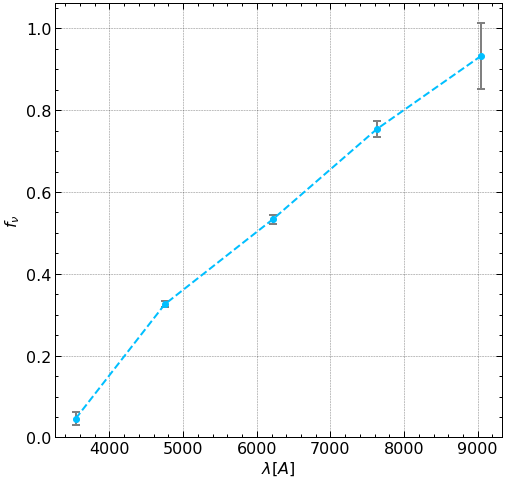

In [138]:
Plot(2000)

## Analyze the output data

In [139]:
results = Table.read('./out_full/results.fits', format='fits')
results = results.to_pandas()
results

,id,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.sdss.gp,bayes.sdss.gp_err,bayes.sdss.ip,bayes.sdss.ip_err,bayes.sdss.rp,bayes.sdss.rp_err,bayes.sdss.up,bayes.sdss.up_err,bayes.sdss.zp,bayes.sdss.zp_err,best.chi_square,best.reduced_chi_square,best.attenuation.B_B90,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.FUV,best.attenuation.V_B90,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.nebular.ne,best.nebular.zgas,best.sfh.age,best.sfh.burst_age,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.sdss.up,best.sdss.gp,best.sdss.rp,best.sdss.ip,best.sdss.zp
0,1237657873254907919,0.024257,0.148864,0.034852,0.180222,0.024923,0.150864,0.813277,0.064224,1.966500,0.049148,1.459651,0.023274,0.161777,0.016154,2.532923,0.126091,7.830311,1.957578,1.331683,0.264,0.60,0.264,0.60,0.264,0.60,2.621240,1.072804,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,647.0,20.0,0.0,0.1,46.5,600.703624,1.0,0.02,10.0,13368.111980,3.803276e+24,0.028312,5.055656e+32,1.299495e+31,1.112661e+33,2.733061e+31,2.468935e+36,2.327126e+32,2.470826e+36,5.658388e+09,1.114690e-04,3.891712e-04,1.230300e-04,5.279591e+36,3.974634e+33,3.919185e+33,5.544877e+31,5.279295e+36,2.953351e+32,2.062985e+09,2.062985e+09,7.630566e+01,3.595402e+09,3.595401e+09,1.153994e+03,7.954457e+50,7.786732e+50,1.677245e+49,0.163447,0.855873,1.471915,1.969252,2.509335
1,1237657873254973544,1.703986,1.943519,2.361601,3.351815,1.720523,1.963627,0.242112,0.012637,0.443666,0.014797,0.344725,0.011248,0.093262,0.009139,0.522656,0.030554,0.118907,0.029727,0.249372,0.044,0.10,0.044,0.10,0.044,0.10,0.737715,0.193441,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1500.0,20.0,0.0,0.1,541.0,1042.152363,1.0,0.02,10.0,13003.015620,7.708407e+24,0.056195,1.829330e+32,2.316632e+34,4.615793e+32,5.564139e+34,4.149507e+35,4.743766e+35,9.687794e+35,3.278326e+09,4.043335e-01,4.437052e-01,4.077165e-01,3.973401e+36,1.988034e+35,3.698753e+33,1.951046e+35,2.966458e+36,1.006943e+36,1.277028e+09,1.276785e+09,2.426724e+05,2.001298e+09,1.997463e+09,3.834491e+06,5.996591e+52,8.757685e+50,5.909014e+52,0.091143,0.253507,0.362687,0.441209,0.500566
2,1237654880726286453,0.912346,1.924841,0.939005,1.961911,0.914507,1.927816,0.207874,0.011325,0.654413,0.019171,0.456883,0.019417,0.044528,0.005430,0.878735,0.046464,0.082754,0.020689,0.770858,0.154,0.35,0.154,0.35,0.154,0.35,1.555298,0.623578,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1500.0,20.0,0.0,0.1,46.5,1453.856923,1.0,0.02,10.0,12764.994344,1.042477e+25,0.074970,1.652499e+33,4.475367e+23,3.824081e+33,9.634630e+23,2.570888e+36,8.364153e+24,2.576364e+36,1.980224e+10,4.211531e-12,1.470370e-11,4.648328e-12,9.388564e+36,1.550025e+34,1.550025e+34,2.094970e+

In [281]:
def Plot(x_data, y_data, x_label='', y_label='', xbins=20, hist2d_nbins=200, x_min=None, x_max=None, y_min=None, y_max=None, xlog=True, ylog=True):
    plt.rcParams['figure.figsize'] = [16 , 8]
    fig, axes = plt.subplots(1, 2)
    
    if x_min==None: x_min = np.min(x_data)
    if x_max==None: x_max = np.max(x_data)
    if y_min==None: y_min = np.min(y_data)
    if y_max==None: y_max = np.max(y_data)


    # First Plot
    ax = axes[0]
    ax.set_title(f'Means of {int(xbins)} log-spaced bins')
    bin_edges = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=xbins+1)
    statistics = np.zeros(shape=(int(xbins), 5))
    
    for i in range(int(xbins)):
        mask_bin = ((x_data>=bin_edges[i]) & (x_data<bin_edges[i+1]))
        x_temp = np.array(x_data[mask_bin])
        y_temp = np.array(y_data[mask_bin])
        N_temp = int(len(x_temp))
        statistics[i] = np.array([N_temp, 
                                  np.mean(x_temp), 
                                  np.std(x_temp, ddof=1)/np.sqrt(N_temp), 
                                  np.mean(y_temp), 
                                  np.std(y_temp, ddof=1)/np.sqrt(N_temp)])

    ax.errorbar(x=statistics[:,1], 
                y=statistics[:,3], 
                xerr=statistics[:,2], 
                yerr=statistics[:,4], 
                fmt='.', color='blue', ecolor='grey', capsize=4, capthick=1)
    
    x_min_bins = np.min(statistics[:,1])
    x_max_bins = np.max(statistics[:,1])
    y_min_bins = np.min(statistics[:,3])
    y_max_bins = np.max(statistics[:,3])
    
    if xlog==True: 
        ax.set_xscale('log')
        ax.set_xlim(0.5*x_min_bins, 1.5*x_max_bins)
    else: 
        ax.set_xlim(0.99*x_min_bins, 1.01*x_max_bins)
        
    if ylog==True: 
        ax.set_yscale('log')
        ax.set_ylim(0.5*y_min_bins, 1.5*y_max_bins)
    else:
        ax.set_ylim(0.95*y_min_bins, 1.05*y_max_bins)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


    # Second Plot
    ax = axes[1]
    ax.set_title(f'2-D histogram of the data')
    binx = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=hist2d_nbins)
    biny = np.logspace(start=np.log10(y_min), stop=np.log10(y_max), num=hist2d_nbins)
    hist = ax.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
    
    if xlog==True: ax.set_xscale('log')
    if ylog==True: ax.set_yscale('log')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    cax = fig.add_axes([0.91, 0.11, 0.02, 0.77])
    fig.colorbar(hist[3], cax=cax)
    
    
    plt.show()
    
    return fig, axes, statistics, hist

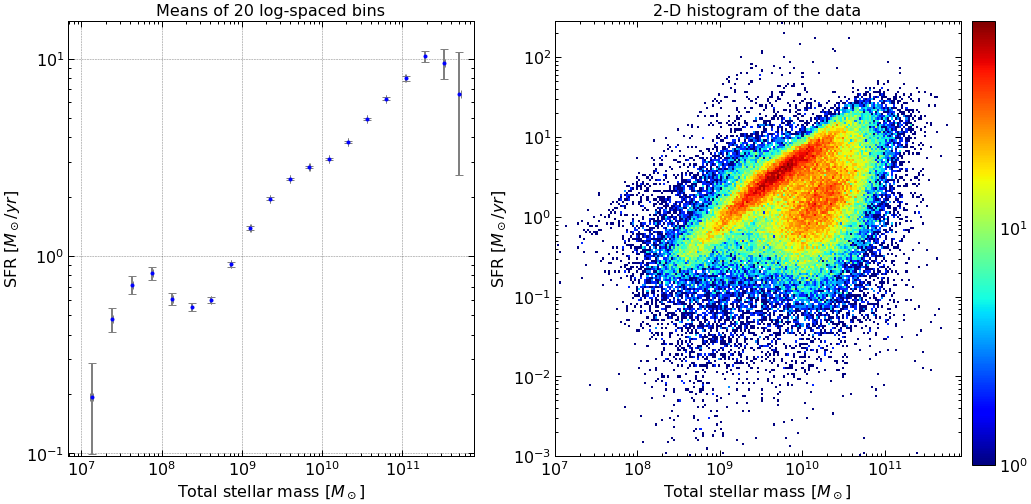

bins occupation = [    9    28    41   152   495  1117  2327  3662  5655  8113 10773 13818
 16417 14943  9293  4121  1195   243    42     3]


In [259]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']

fig, ax, statistics, hist = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'SFR $[M_\odot/yr]$', xbins=20, x_min=1e7, y_min=1e-3);
print(f'bins occupation = {statistics[:,0].astype(int)}')



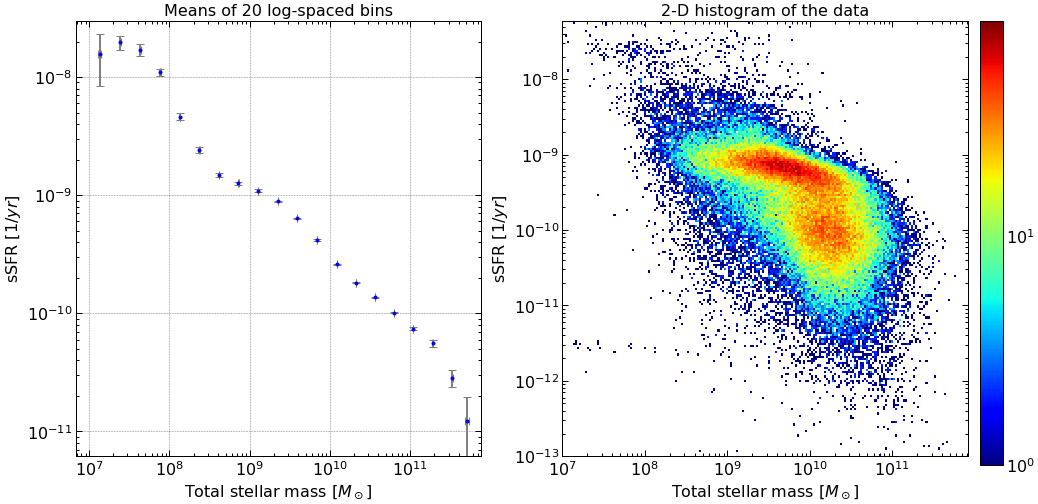

bins occupation = [    9    28    41   152   495  1117  2327  3662  5655  8113 10773 13818
 16417 14943  9293  4121  1195   243    42     3]


In [295]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'sSFR $[1/yr]$', xbins=20, hist2d_nbins = 200, x_min=1e7, y_min=1e-13);
print(f'bins occupation = {statistics[:,0].astype(int)}')

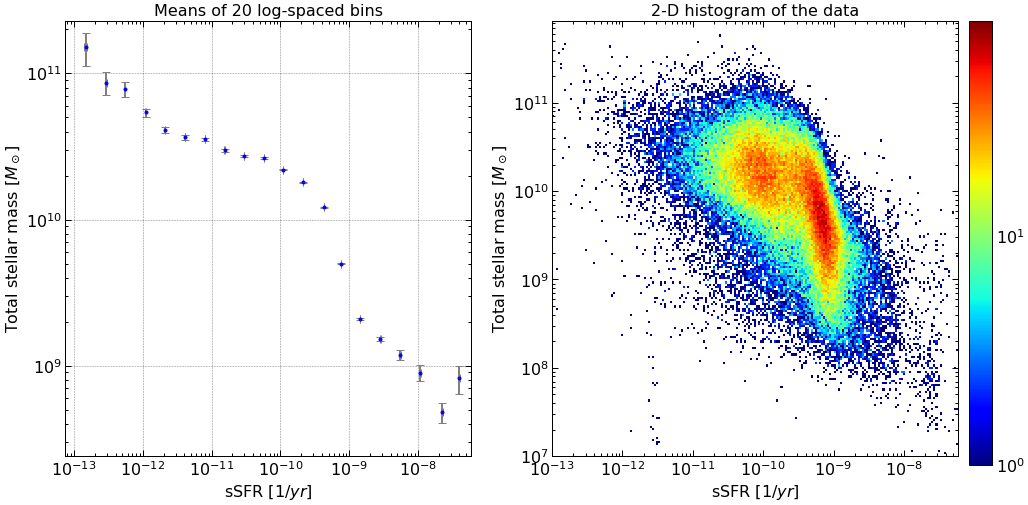

bins occupation = [   16    23    64   187   354   741  1523  2965  5698 10568 13575 12278
 16113 20539  5170  1532   674   200   186    52]


In [298]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics, hist = Plot(y_data, x_data, 'sSFR $[1/yr]$', 'Total stellar mass $[M_\odot]$', xbins=20, hist2d_nbins = 200, y_min = 1e7, x_min = 1e-13);
print(f'bins occupation = {statistics[:,0].astype(int)}')

Text(0.5, 1.0, 'point density marginalized over sSFR')

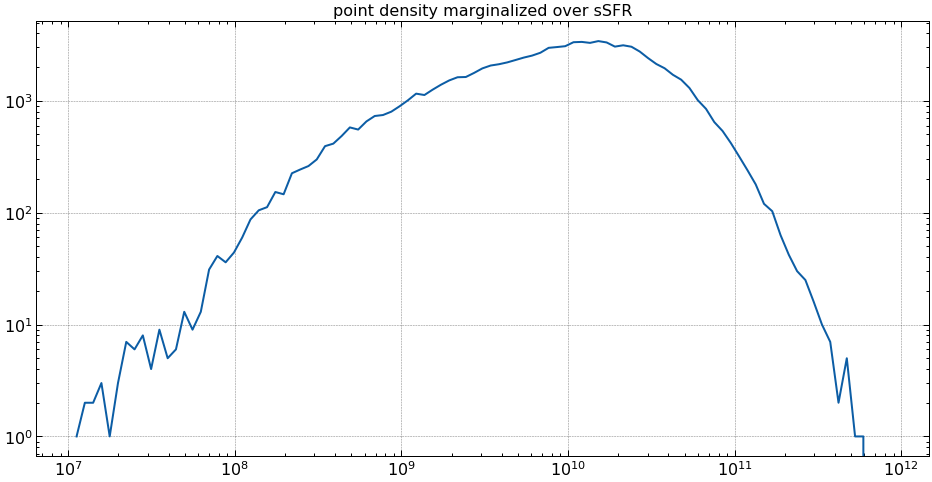

In [286]:
xbins_middle = hist[1][:-1] + np.diff(hist[1])
marginalized_distr_over_sSFR = np.sum(hist[0], axis = 1)
plt.plot(xbins_middle, marginalized_distr_over_sSFR)
plt.xscale('log')_
plt.yscale('log')
plt.title("point density marginalized over sSFR")

1212812.5520308241


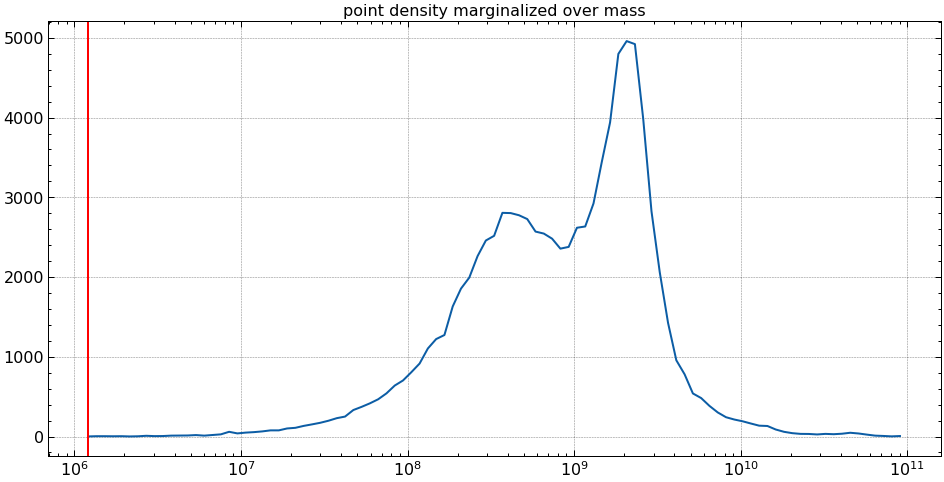

In [294]:
ybins_middle = hist[2][:-1] + np.diff(hist[1])
marginalized_distr_over_mass = np.sum(hist[0], axis = 0)
plt.plot(ybins_middle, marginalized_distr_over_mass)
plt.xscale('log')
#plt.yscale('log')
plt.title("point density marginalized over mass")
mask_for_min = ((ybins_middle > 10**8.4) & (ybins_middle < 10**9.1))

my_min = np.argmin(marginalized_distr_over_mass[mask_for_min])
print(ybins_middle[my_min])
plt.axvline(ybins_middle[my_min], color = 'red')

# cosa dire: nella MS sSFR non dipende dalla massaaaaa

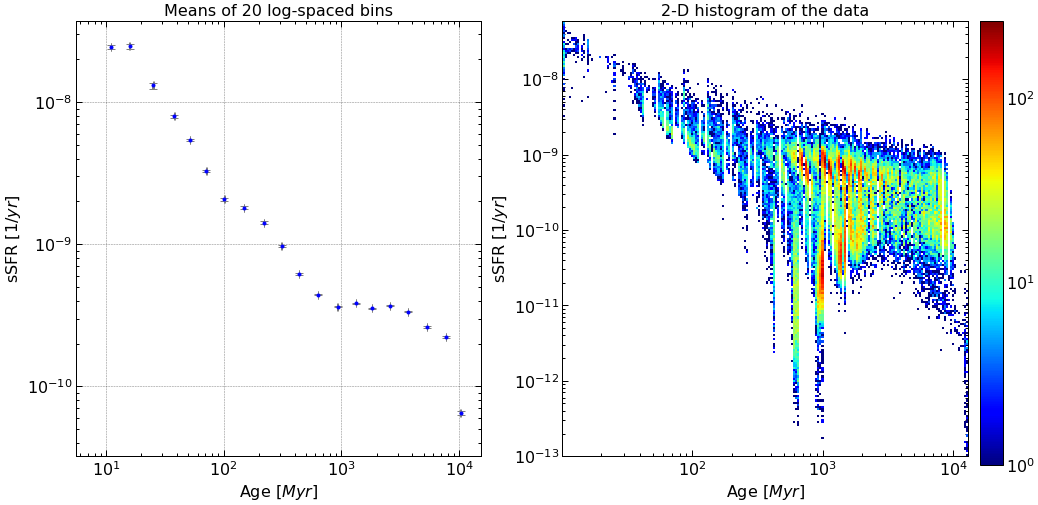

bins occupation = [  215    47    51   165   380   846  1053  1350   915  1123  2640  8471
 16953 19122 13951  6830  5102  4731  7800   738]


In [143]:
x_data = results['best.stellar.age_m_star']
y_data = results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', xbins=20, y_min=1e-13);
print(f'bins occupation = {statistics[:,0].astype(int)}')

## Prof Results

In [144]:
#prof_results = Table.read('SDSS_LAB2024_PROFresults.fits', format='fits')
#prof_results = prof_results.to_pandas()
#prof_results

In [145]:
#x_data = prof_results['bayes_stellar_m_star']
#y_data = prof_results['bayes_sfh_sfr']
#
#Plot(x_data, y_data, [1,12], [-4,3], 'Total stellar mass $[M_\odot]$', 'SFR $[M_\odot/yr]$')

# Lecture 6

In [146]:
# Function to extract relevant infromations about some data by binning them and
# searching for some variable inside the bins
#
# x_data: the data to be binned
# qty_mask: a mask on x_data that tells whether each element has some (user speecifed) property or not
# bin_type: the type of spacing along x_data to be used to make the bins
# xbins: the number of bins
# x_min, x_max: user specified bounds to be used to bin the data
def Bin_analysis(x_data, qty_mask,
                 bin_type='log', xbins=20,
                 x_min=None, x_max=None):
    # If not specified, use data limits as bounds for the binning
    if x_min == None: x_min = np.min(x_data)
    if x_max == None: x_max = np.max(x_data)

    # Use the specified bins spacing
    if bin_type.lower() == 'log':
        bin_edges = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=xbins+1)
    elif bin_type.lower() == 'lin':
        bin_edges = np.linspace(start=x_min, stop=x_max, num=xbins+1)
    elif bin_type.lower() == 'geom':
        bin_edges = np.geomspace(start=x_min, stop=x_max, num=xbins+1)
    elif bin_type.lower() == 'scott': 
        bin_edges = (fancyhist(x_data, bins="scott", histtype="step", density=True))[1]
    elif bin_type.lower() == 'freedman': 
        bin_edges = fancyhist(x_data, bins="freedman", histtype="step", density=True)[1]

    # An array of (empty) dictionaries
    bins_info = np.array([dict() for i in range(len(bin_edges)-1)])

    for i in range(len(bin_edges)-1):
        # Make a mask of the current bin
        bin_mask = (x_data >= bin_edges[i]) & (x_data < bin_edges[i+1])

        # Make a mask of the inspected quantity inside the bin
        qty_bin_mask = qty_mask & bin_mask

        # Get the elements inside the current bin
        x_bin = x_data[bin_mask]

        # Fill the bin's dictionary with useful informations
        bins_info[i]['n_tot'] = np.sum(bin_mask)
        bins_info[i]['n_qty'] = np.sum(qty_bin_mask)
        bins_info[i]['mean'] = np.mean(x_bin)
        # If the bin is empty, set its statistics to zero
        if bins_info[i]['n_tot'] == 0:
            bins_info[i]['qty_frac'] = 0
            bins_info[i]['mean_err'] = 0
            bins_info[i]['quantiles'] = np.array([0, 0, 0, 0, 0])
        else:
            bins_info[i]['qty_frac'] = bins_info[i]['n_qty'] / bins_info[i]['n_tot']
            bins_info[i]['mean_err'] = np.std(x_bin, ddof=1) / np.sqrt(bins_info[i]['n_tot'])
            bins_info[i]['quantiles'] = np.quantile(x_bin, [0.05, 0.16, 0.5, 0.84, 0.95])

    return bins_info

# A function to plot informations contained in a bins_info object from the Bin_analysis() function
#
# bins_info: the object containing the data (see Bin_analysis())
# x_key, y_key: the keys of the dictionaries inside bins_info that contains the data to plot
# x_scale, y_scale: the scales of the axis. Matplotlib values are available
# plt_err: whether to plot error bars on the x axis or not
# err_type: the key of the dictionaries inside bins_info containing the errors
# q: if x_key or y_key='quantiles' q is the index of the quantile to use
# q_err: if err_type='quantiles', q_err is a list of 2 indexes of the quantiles to use 
# x_low, x_up, y_low, y_up: limits of the axes
# bad_bins: a list of indexes of the bins contained in bins_info to be excluded from the plot
# Other parameters are just for styling the plot. They are passed as they are to the plotting functions
# They can have any value accepted by Matplotlib
def Bin_plotter(bins_info, x_key='mean_err', y_key='qty_frac',
                x_scale='log', y_scale='linear',
                plt_err=True, err_type='mean_err', q=2, q_err=[1, 3],
                marker='.', markersize=None,
                linestyle='', linewidth=None, elinewidth=None,
                x_label=None, y_label=None, title=None, figsize=None,
                color=None, ecolor=None,
                markerfacecolor=None, markeredgecolor=None,
                label=None,
                x_low=None, x_up=None, y_low=None, y_up=None,
                bad_bins=[]):
    # Initialise the plot
    fig, ax = plt.subplots(figsize=figsize)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xscale(x_scale)
    ax.set_yscale(y_scale)

    # Get the good bins
    good_bins = [i for i in range(len(bins_info)) if i not in bad_bins]

    # Initialise variables for the data to plot
    x_data = np.zeros(len(bins_info))
    y_data = np.zeros(len(bins_info))

    # Get the data to plot
    for i in range(len(bins_info)):
        if x_key == 'quantiles':
            x_data[i] = bins_info[i][x_key][q]
        else:
            x_data[i] = bins_info[i][x_key]

        if y_key == 'quantiles':
            y_data[i] = bins_info[i][y_key][q]
        else:
            y_data[i] = bins_info[i][y_key]

    # Plot errors only if required
    if plt_err:
        if err_type == 'mean_err':
            x_err = np.array([bins_info[i][err_type] for i in range(len(bins_info))])

            ax.errorbar(x_data[good_bins], y_data[good_bins], xerr=x_err[good_bins],
                        marker=marker, markersize=markersize,
                        linestyle=linestyle, linewidth=linewidth, elinewidth=elinewidth,
                        color=color, ecolor=ecolor,
                        markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                        label=label)
        elif err_type == 'quantiles':
            # Get the required quantiles
            x_err = np.array([bins_info[i][err_type][q_err] for i in range(len(bins_info))])

            # Compute the lower and upper error using the quantiles
            x_err[:, 0] = x_data - x_err[:, 0]
            x_err[:, 1] = x_err[:, 1] - x_data

            # for asymmetric errors xerr must have shape (2, N) (see Matplotlib documentation)
            ax.errorbar(x_data[good_bins], y_data[good_bins], xerr=np.swapaxes(x_err[good_bins], 0, 1),
                        marker=marker, markersize=markersize,
                        linestyle=linestyle, linewidth=linewidth, elinewidth=elinewidth,
                        color=color, ecolor=ecolor,
                        markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                        label=label)
    else:
        ax.plot(x_data[good_bins], y_data[good_bins],
                marker=marker, markersize=markersize,
                linestyle=linestyle, linewidth=linewidth,
                color=color,
                markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor,
                label=label)

    # Plotting errros seems to produce some strange behaviors of the artists in the figure
    # relim() recompute the data limits based on current artists
    # By default it includes also invisible artists
    ax.relim(visible_only=False)

    # Get the current limits of the axis
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()

    # If user's limits are not specified, don't change them
    if x_low == None: x_low = x_lim[0]
    if x_up == None: x_up = x_lim[1]
    if y_low == None: y_low = y_lim[0]
    if y_up == None: y_up = y_lim[1]

    # Update the axes limits
    ax.set_xlim(x_low, x_up)
    ax.set_ylim(y_low, y_up)

    if label != None:
        ax.legend()

    return fig, ax

## Main Sequence

In [147]:
def retta_pop (binx):
    return binx*10**(-9.6)  + 10**(-3)

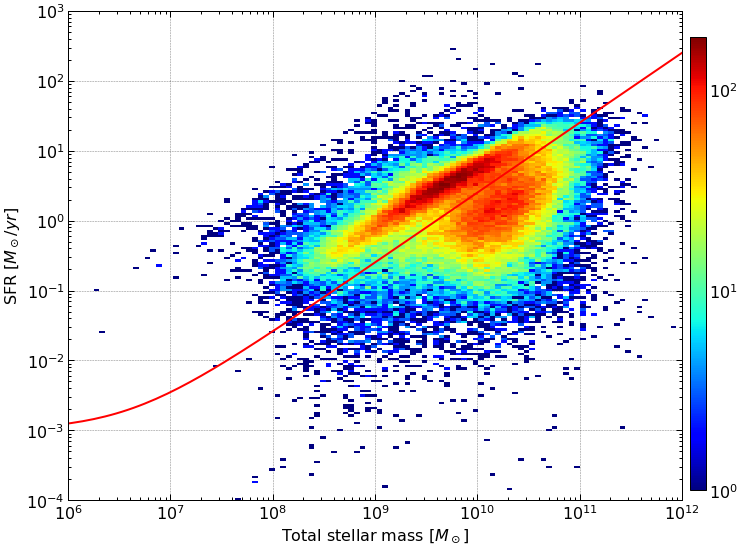

In [148]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']

#plt.rcParams['figure.figsize'] = [10 , 16]
fig = plt.figure(figsize=(11, 9))

#fig, axes = plt.subplots(0)
#ax = axes[0]
binx = np.logspace(start=1, stop=12, num=200)
biny = np.logspace(start=-4, stop=3, num=200)
hist = plt.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#x = np.linspace(10**6, 10**12, 1000)
y_key = retta_pop(binx)

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e6)
plt.ylim(1e-4, 1e3)
plt.xlabel('Total stellar mass $[M_\odot]$')
plt.ylabel('SFR $[M_\odot/yr]$')
plt.grid()

plt.plot(binx, y_key, color = "red")

cax = fig.add_axes([0.91, 0.14, 0.02, 0.7])
fig.colorbar(hist[3], cax=cax)


### Now let's get the number of galaxies above and below the line and compute their fraction, in function of mass

In [149]:
# Whether to run this cell or not (it takes a while, but not that much)
run_MS_counter = True

# Whether to save the results or not
save_results = False

#------------------------------------------------------
if run_MS_counter:
    # This is a mask on the already masked dataset: raw_data[mask][agn_mask]
    # It (will) select only AGNs, i.e. points (galaxies) above the red line
    MS_mask = np.zeros(len(results['best.stellar.m_star']), dtype=bool)

    for i in tqdm(range(len(results['best.stellar.m_star']))):
        x_temp =(results['best.stellar.m_star'][i])
        y_temp = (results['bayes.sfh.sfr10Myrs'][i])
        
        if y_temp>retta_pop(x_temp): MS_mask[i]=True

    # Save the mask and the agn_mask (since the agn_mask is subordinate to the first mask)
    # One can access the file using np.load()
    if save_results:
        np.savez('SDSS_spectroscopy_masks', MS_mask=MS_mask)

100%|██████████| 92483/92483 [00:01<00:00, 80392.56it/s]


In [150]:
# Be sure the file is updated to the current working frame, otherwise run the cell above and save the file
#saved_masks = np.load('SDSS_spectroscopy_masks.npz')
#MS_mask = saved_masks['MS_mask']

In [151]:
n_MS = np.sum(MS_mask)
n_out_of_MS = len(results['best.stellar.m_star']) - n_MS
n_tot = len(results['best.stellar.m_star'])
print(n_MS, n_out_of_MS, n_tot)

47057 45426 92483


#### plot just to make sure i got it right

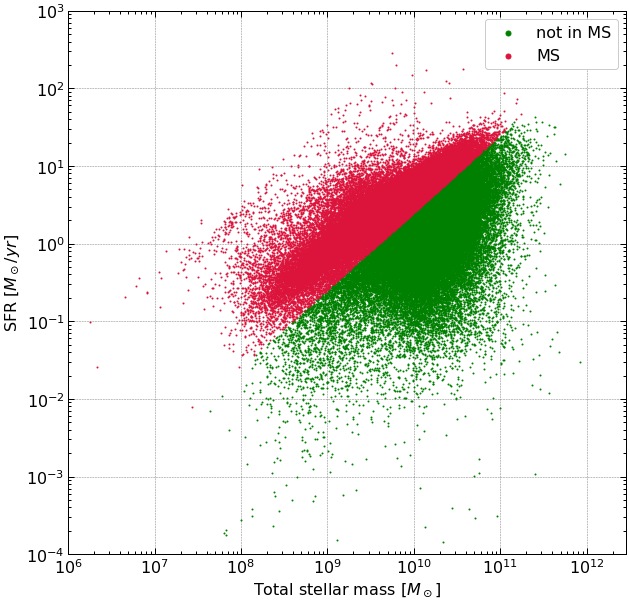

In [152]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']

plt.rcParams['figure.figsize'] = [10 , 10]
fig, ax = plt.subplots(1, 1)

ax.scatter(x_data[~MS_mask], y_data[~MS_mask], s=1, color='green', label='not in MS')
ax.scatter(x_data[MS_mask], y_data[MS_mask], s=1, color='crimson', label='MS')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e6)
ax.set_ylim(1e-4, 1e3)


ax.set_xlabel('Total stellar mass $[M_\odot]$')
ax.set_ylabel('SFR $[M_\odot/yr]$')

ax.legend(markerscale=5);

In [153]:
bins_info = Bin_analysis(results['best.stellar.m_star'], MS_mask,
                         xbins=30, bin_type='log', x_min = 10**8, x_max = 10**(11.3)) 
print(bins_info.shape)

for i in (range(len(bins_info))):
    print( bins_info[i]['n_tot'])

(30,)
170
266
394
547
774
1038
1295
1617
1863
2384
2738
3371
3746
4428
4865
5294
6116
6701
7424
7385
7047
6487
5116
3983
2939
1866
1121
627
323
148


from astropy.visualization.hist import hist as fancyhist
histo_scott_rule = fancyhist(results['best.stellar.m_star'], bins="scott", histtype="step",density=True)
histo_freedman_rule = fancyhist(results['best.stellar.m_star'], bins="freedman", histtype="step",density=True)
#plt.xlim(-5,25)

print(len(histo_freedman_rule))

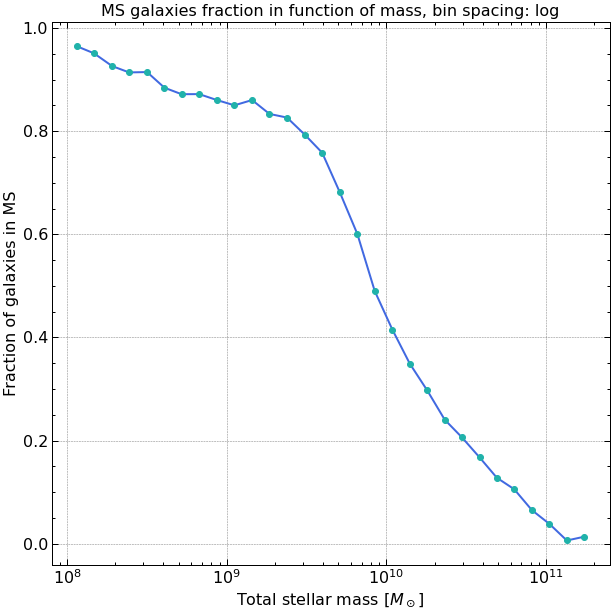

In [154]:
Bin_plotter(bins_info, x_key='mean', y_key='qty_frac',
            plt_err=True, err_type='mean_err',
            x_label='Total stellar mass $[M_\odot]$', y_label='Fraction of galaxies in MS',
            markersize=12, linestyle='-',
            ecolor='red', color='royalblue', markerfacecolor='lightseagreen', markeredgecolor='lightseagreen',
            bad_bins=list(range(0)), title = "MS galaxies fraction in function of mass, bin spacing: log");

## Galaxy Environment

In [181]:
from astropy.coordinates import FK5, SkyCoord
import astropy.constants as astroconst
from astropy.cosmology import Planck18 as cosmo
from astropy import units as u

In [182]:
# We need to reopen the .fits file, since Astropy doesn't like that we converted it to a Pandas dataframe
data = Table.read('SDSS_LAB2024_photometry.fits', format='fits') 

In [183]:
c = astroconst.c #m/s
c_km_s = c*u.km/(1000*u.m)
print(c_km_s)

299792.458 km / s


## cylinder definition: we could also try different cylinders and see how the structures we see change!!

In [184]:
radius = 500*u.kpc
depth = 1000*u.km/u.s 

In [198]:
# Whether to run this cell or not (it takes a while)
# The results of this cell are already in SDSS_environment.fits (used in the cell below)
compute_surface_density = True

#-----------------------------------------------------
if compute_surface_density:

    NEIcoords = SkyCoord(ra=data['ra']*u.deg, dec=data['dec']*u.deg)
    NEIredshift = data['redshift']

    n_galaxies_cyl = np.zeros(len(data['id']))

    for gal in tqdm(range(0, len(data['id']))):
        PRIcoords = SkyCoord(ra=data['ra'][gal]*u.deg, dec=data['dec'][gal]*u.deg)
        PRIredshift = data['redshift'][gal]
        
        # Obtain a separation of all galaxies from the primary in units of arcseconds
        Separation = NEIcoords.separation(PRIcoords).to(u.arcsec)
        # Convert it to kpc 
        ang_1kpc = cosmo.arcsec_per_kpc_proper(PRIredshift)
        Separation = Separation/ang_1kpc
        
        # Now we also want the separation in velocity (in km/s)
        Sep_vel = (NEIredshift-PRIredshift)*c_km_s / (1+PRIredshift)
        
        # Define the cylinder
        mask_base = Separation < radius
        mask_depth = (Sep_vel < depth) & (Sep_vel > - depth)
        
        mask_cylinder = mask_base & mask_depth
        n_galaxies_cyl[gal] = mask_cylinder.sum()
        
    surface_density = n_galaxies_cyl / (np.pi*radius**2)
    print(surface_density) # ".value" to remove the Astropy units

100%|██████████| 92483/92483 [28:40<00:00, 53.75it/s]

[7.63943727e-06 1.27323954e-06 1.27323954e-06 ... 2.54647909e-06
 1.27323954e-06 2.54647909e-06] 1 / kpc2


In [204]:
# Export the surface-density values
#tabout = Table((data['id'], data['ra'], data['dec'], surface_density), names=('id', 'ra', 'dec', 'surface_density'))
#tabout.write('SDSS_environment_depth_1000.fits', overwrite=True)

In [210]:
# Import the surface-density values
surface_density = np.array(Table.read('SDSS_environment_depth_1000.fits', format='fits')['surface_density'], dtype='float')
surface_density

array([7.63943727e-06, 1.27323954e-06, 1.27323954e-06, ...,
       2.54647909e-06, 1.27323954e-06, 2.54647909e-06])

## Plot

Text(0.5, 0, 'density')

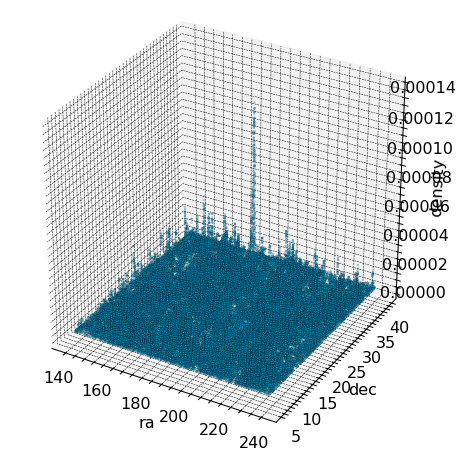

In [211]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

ax.set_box_aspect([1, 1, 1])

ax.scatter(data['ra'], data['dec'], surface_density, 'o', s=3, edgecolor='black', linewidth=0.4, color='deepskyblue', alpha=0.3)

ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('density')

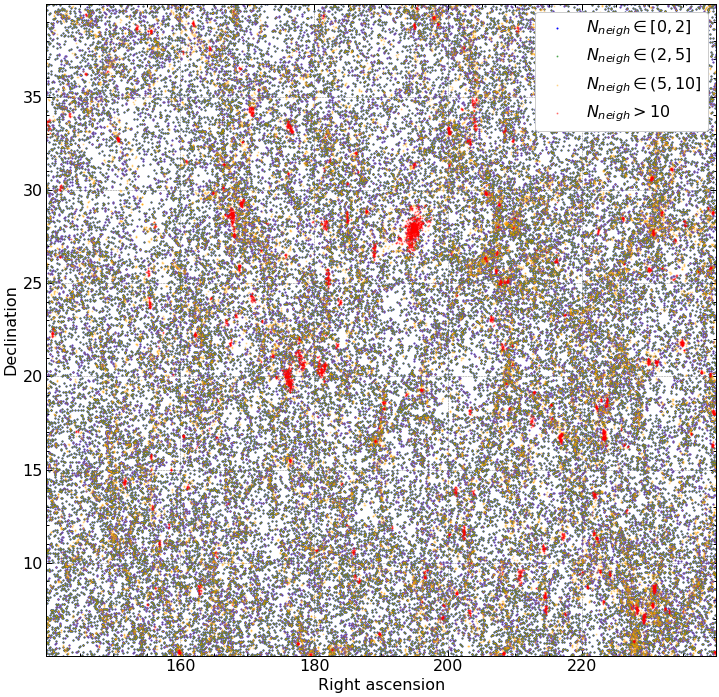

In [212]:
n_galaxies_cyl = surface_density*np.pi*radius.value**2

plt.figure(figsize=(12,12))

mask = n_galaxies_cyl<=2
plt.scatter(data['ra'][mask], data['dec'][mask], s=1, color='blue', alpha=1, label='$N_{neigh} \in [0,2]$')

mask = np.logical_and(n_galaxies_cyl<2, n_galaxies_cyl<=5)
plt.scatter(data['ra'][mask], data['dec'][mask], s=1, color='green', alpha=0.5, label='$N_{neigh} \in (2,5]$')

mask = np.logical_and(n_galaxies_cyl<5, n_galaxies_cyl<=10)
plt.scatter(data['ra'][mask], data['dec'][mask], s=1, color='orange', alpha=0.3, label='$N_{neigh} \in (5,10]$')

mask = n_galaxies_cyl>10
plt.scatter(data['ra'][mask], data['dec'][mask], s=1, color='red', alpha=0.4, label='$N_{neigh} > 10$')

plt.xlim(np.min(data['ra']), np.max(data['ra']))
plt.ylim(np.min(data['dec']), np.max(data['dec']))
plt.xlabel('Right ascension')
plt.ylabel('Declination')


'''IF ONE WANTED TO PUT THE BOX WITH CYLINDER DIMENTIONS:
radius_dimentionless = radius / u.kpc
depth_dimentionless = depth /(u.km/u.s)
textstr = '\n'.join(('cylinder of dimensions: ', 
    r'$radius (kpc)=%.2f$' % (radius_dimentionless, ),
    r'$depth (km/s)=%.2f$' % (depth_dimentionless, )))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
plt.text(0.81, 0.85, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
'''


lgnd = plt.legend(loc='upper right')
#for marker in lgnd.legend_handles:
#   marker._sizes = [40]

# potrebbe essere carino dividere in base al redshift, vedere vari plot di densità andando indietro con z per capire quando si formano strutture

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  


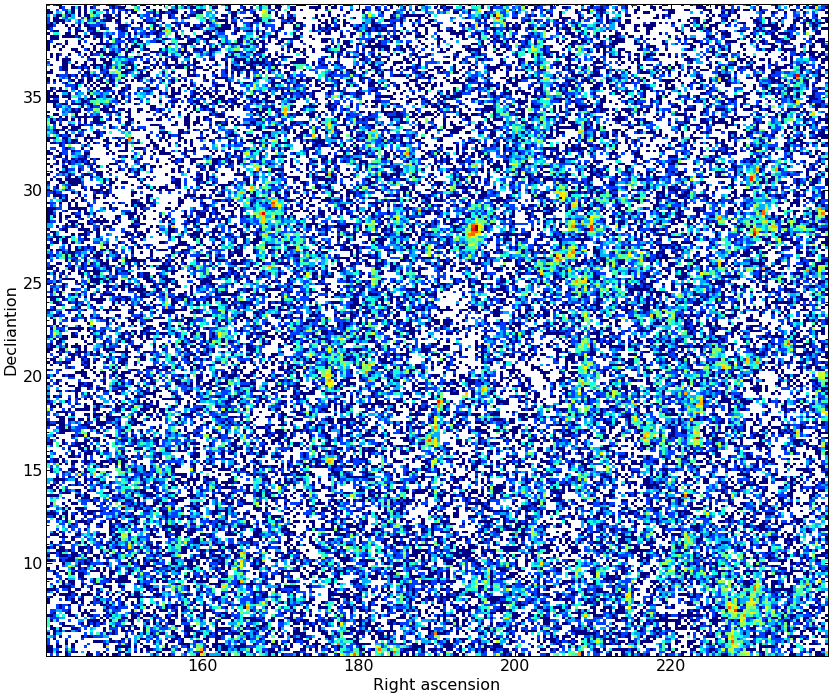

In [213]:
plt.figure(figsize=(14,12))

hist = plt.hist2d(data['ra'], data['dec'], bins=(250, 250), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Right ascension')
plt.ylabel('Decliantion')
fig.colorbar(hist[3])

### Dependencies

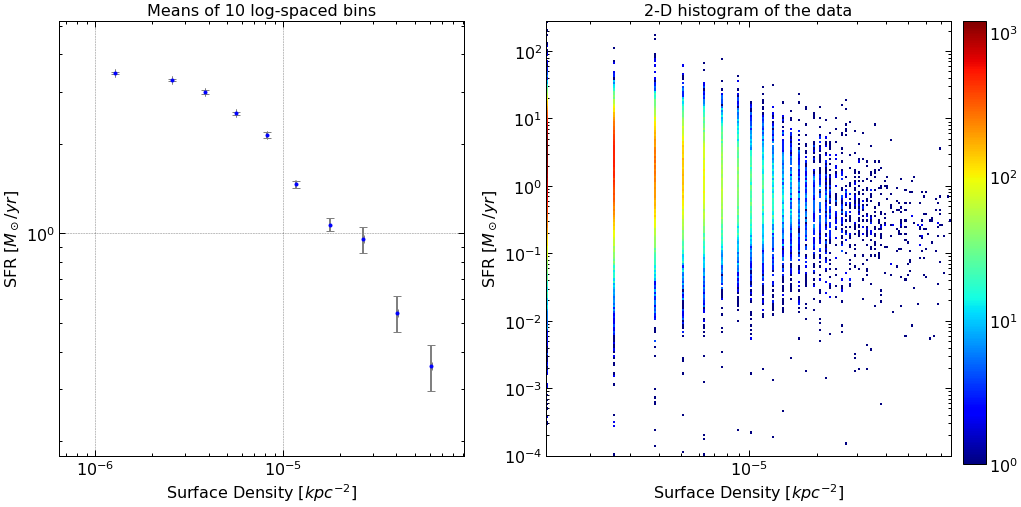

bins occupation = [42840 20133 10439  9998  4193  3102  1167   403   143    64]


In [194]:
x_data = surface_density
y_data = results['bayes.sfh.sfr10Myrs']

fig, ax, statistics = Plot(x_data, y_data, 'Surface Density $[kpc^{-2}]$', 'SFR $[M_\odot/yr]$', xbins=10, y_min=1e-4);
print(f'bins occupation = {statistics[:,0].astype(int)}')

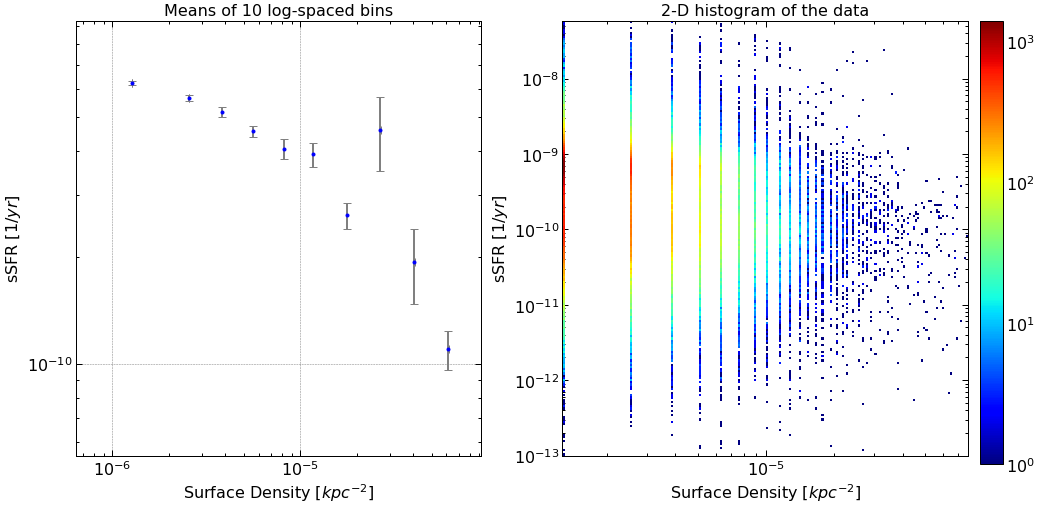

bins occupation = [42840 20133 10439  9998  4193  3102  1167   403   143    64]


In [195]:
x_data = surface_density
y_data = results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star']

fig, ax, statistics = Plot(x_data, y_data, 'Surface Density $[kpc^{-2}]$', 'sSFR $[1/yr]$', xbins=10, y_min=1e-13);
print(f'bins occupation = {statistics[:,0].astype(int)}')

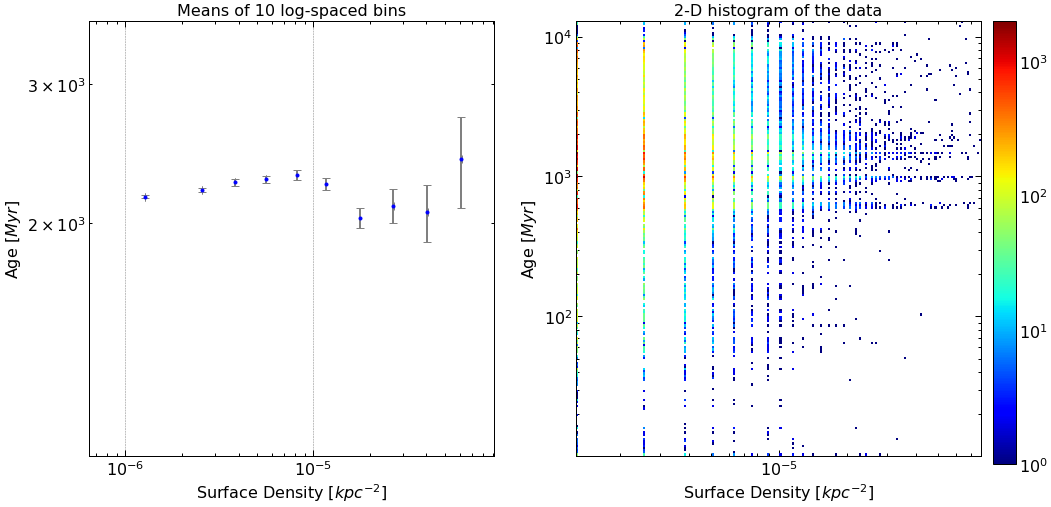

bins occupation = [42840 20133 10439  9998  4193  3102  1167   403   143    64]


In [196]:
x_data = surface_density
y_data = results['best.stellar.age_m_star']

fig, ax, statistics = Plot(x_data, y_data, 'Surface Density $[kpc^{-2}]$', 'Age $[Myr]$', xbins=10);
print(f'bins occupation = {statistics[:,0].astype(int)}')

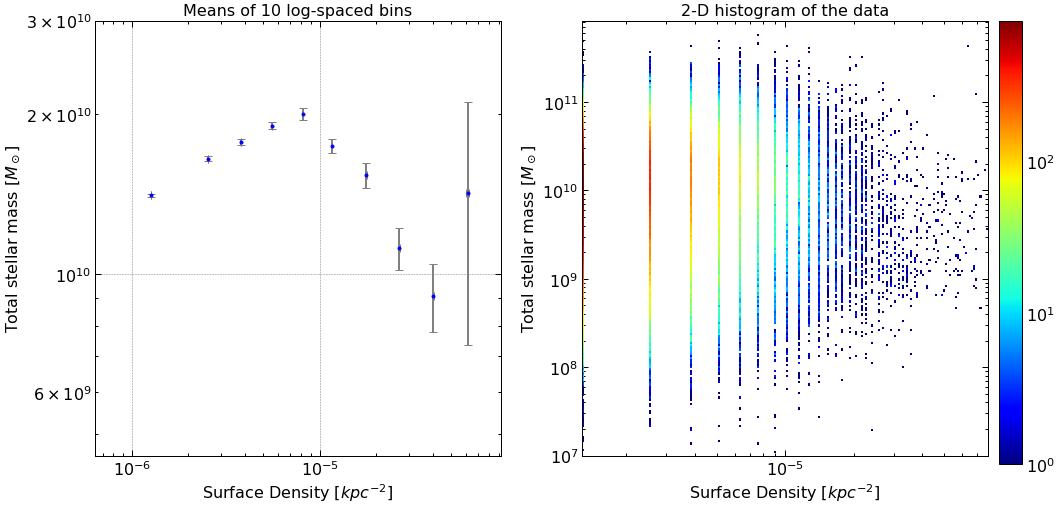

bins occupation = [42840 20133 10439  9998  4193  3102  1167   403   143    64]


In [197]:
x_data = surface_density
y_data = results['best.stellar.m_star']

fig, ax, statistics = Plot(x_data, y_data, 'Surface Density $[kpc^{-2}]$', 'Total stellar mass $[M_\odot]$', xbins=10, y_min=1e7);
print(f'bins occupation = {statistics[:,0].astype(int)}')

# Lecture 7

## Metallicity

### potremmo dare un occhio a metallicity and attenuation

In [164]:
data = Table.read('SDSS_LAB2024_spectroscopy.fits', format='fits')
data = data.to_pandas()
data

,id,Ra,Dec,SpecObjID,oii_3726_flux,oii_3726_flux_err,oii_3729_flux,oii_3729_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,h_alpha_flux,h_alpha_flux_err,nii_6584_flux,nii_6584_flux_err,sii_6717_flux,sii_6717_flux_err,sii_6731_flux,sii_6731_flux_err,log_oh
0,1237657873254907919,140.153626,39.308208,1056110100969711616,101.519500,7.398387,140.663100,7.543258,151.599239,4.972585,104.966700,3.483613,454.801161,5.767852,127.769300,2.672537,106.806100,2.863982,73.735440,2.606843,8.734623
1,1237657873254973544,140.325684,39.456471,1056110375847618560,38.902310,4.698286,43.133400,4.939773,54.816254,4.419355,18.775540,2.549214,129.358509,2.765097,35.350590,1.867918,29.757880,1.816272,19.586350,1.636298,8.811741
2,1237654880726286453,190.287293,5.309674,952651549304186880,10.251290,4.456565,27.182910,4.610123,51.681798,15.083097,23.813960,2.912106,63.133956,5.142882,17.806730,2.474831,14.909740,2.595782,4.719933,3.016939,-9999.000000
3,1237654880727728243,193.587524,5.282654,954879439135598592,17.041710,7.241267,29.625190,7.116340,107.328879,18.837620,29.908130,4.471506,150.623169,9.592171,69.223010,5.355443,27.537210,4.663846,16.293380,4.523975,-9999.000000
4,1237654880728842356,196.179871,5.124015,956053988573210624,88.530870,4.791603,100.263500,4.959826,114.449956,3.808321,55.175960,2.417139,257.938248,3.805013,54.351610,1.815738,55.005020,1.858351,38.263330,1.633464,8.746394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92478,1237654881812545849,219.128952,5.382636,2058168727995705344,6.568196,5.159519,4.854383,5.068860,53.910157,24.596951,-2.758879,2.225314,60.120945,9.137989,-0.470011,1.846521,1.097325,2.058043,-2.535174,1.943148,-9999.000000
92479,1237654881814511891,223.538071,5.049211,2060422194793572352,0.526393,8.585512,-1.139811,8.454541,15.348567,-777.892867,1.975070,2.705857,19.204711,5.814079,0.766059,1.707300,0.104225,1.906676,-1.965431,2.169719,-9999.000000
92480,1237651823782396044,214.389114,5.217847,656554436428064768,23.171340,4.409194,29.234810,4.638111,74.191878,7.748188,17.575280,3.023975,171.301288,5.229351,74.111350,3.562458,24.082720,3.581982,18.650090,3.400767,-9999.000000
92481,1237651823782985830,215.724396,5.183447,657669890873780224,74.059460,4.793346,59.283220,4.838350,169.463578,4.029014,31.102540,2.454101,571.920179,5.911172,228.338300,3.343860,82.110980,2.359019,69.968430,2.290802,9.109709


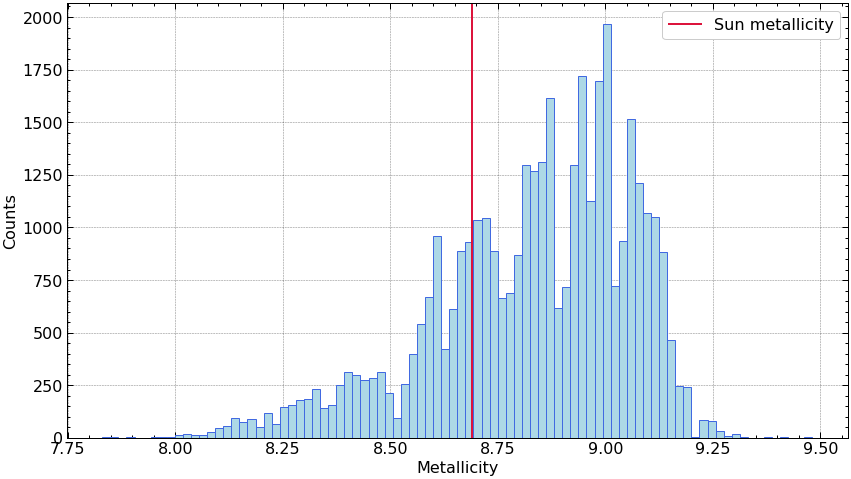

In [165]:
from astropy.visualization.hist import hist as fancyhist

mask = data['log_oh']>-4

plt.figure(figsize=(14,8))
fancyhist(data['log_oh'][mask], bins="freedman", color='lightblue', edgecolor='royalblue');
#plt.hist(data['log_oh'][mask], bins=70, color='lightblue', edgecolor='royalblue');
plt.axvline(8.69, color='crimson', label='Sun metallicity')
plt.xlabel('Metallicity')
plt.ylabel('Counts')
plt.legend();

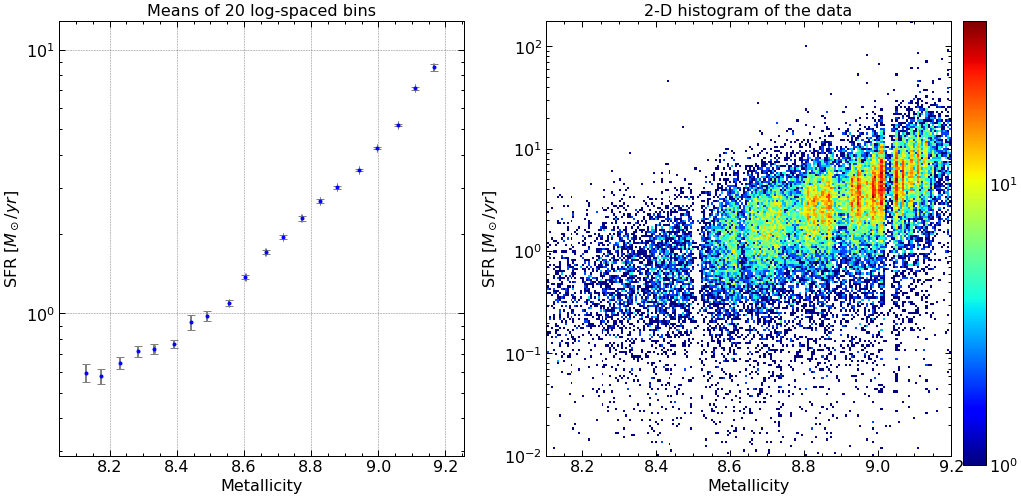

bins occupation = [ 192  204  293  476  525  724  815  594 1109 2096 2170 3043 2066 3798
 3192 3928 4778 3529 3158 1001]


In [166]:
x_data = data['log_oh'][mask]
y_data = results['bayes.sfh.sfr10Myrs'][mask]

fig, ax, statistics = Plot(x_data, y_data, 'Metallicity', 'SFR $[M_\odot/yr]$', xbins=20, x_min=8.1, x_max=9.2, y_min=1e-2, xlog=False);
print(f'bins occupation = {statistics[:,0].astype(int)}')

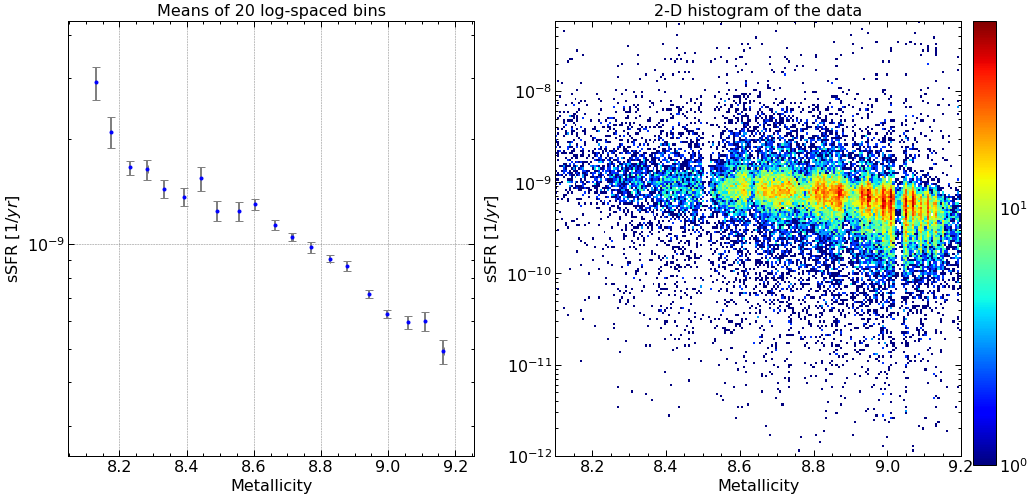

bins occupation = [ 192  204  293  476  525  724  815  594 1109 2096 2170 3043 2066 3798
 3192 3928 4778 3529 3158 1001]


In [167]:
x_data = data['log_oh'][mask]
y_data = results['bayes.sfh.sfr10Myrs'][mask]/results['best.stellar.m_star'][mask]

fig, ax, statistics = Plot(x_data, y_data, 'Metallicity', 'sSFR $[1/yr]$', xbins=20, x_min=8.1, x_max=9.2, y_min=1e-12, xlog=False);
print(f'bins occupation = {statistics[:,0].astype(int)}')

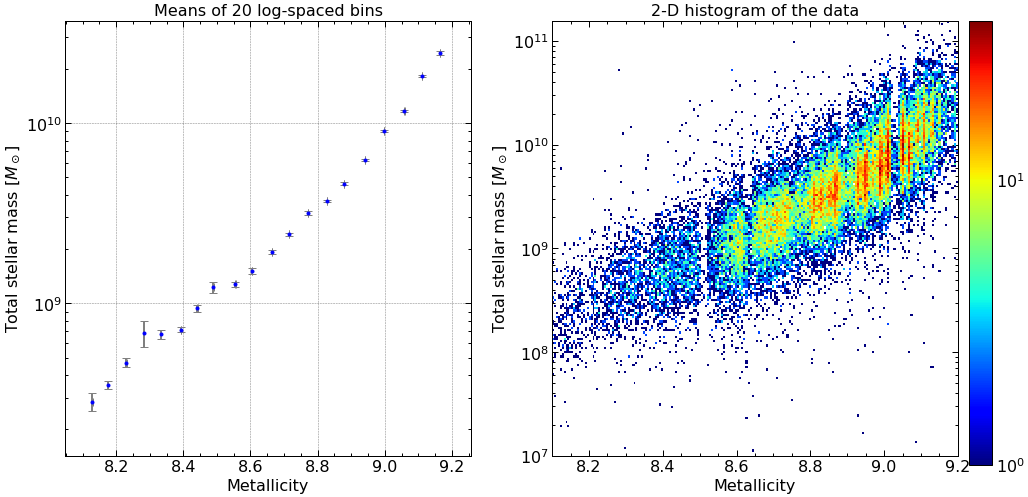

bins occupation = [ 192  204  293  476  525  724  815  594 1109 2096 2170 3043 2066 3798
 3192 3928 4778 3529 3158 1001]


In [168]:
x_data = data['log_oh'][mask]
y_data = results['best.stellar.m_star'][mask]

fig, ax, statistics = Plot(x_data, y_data, 'Metallicity', 'Total stellar mass $[M_\odot]$', xbins=20, x_min=8.1, x_max=9.2, y_min=1e7, xlog=False);
print(f'bins occupation = {statistics[:,0].astype(int)}')

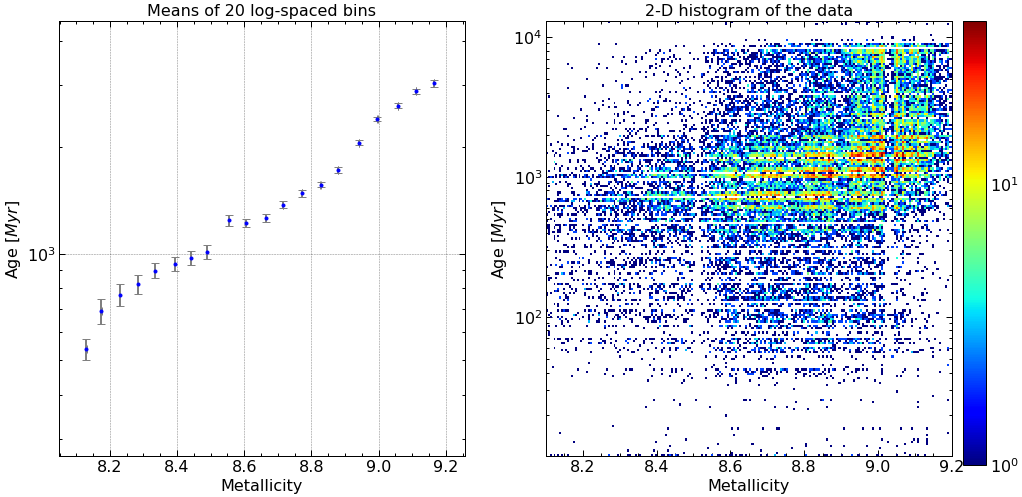

bins occupation = [ 192  204  293  476  525  724  815  594 1109 2096 2170 3043 2066 3798
 3192 3928 4778 3529 3158 1001]


In [169]:
x_data = data['log_oh'][mask]
y_data = results['best.stellar.age_m_star'][mask]

fig, ax, statistics = Plot(x_data, y_data,  'Metallicity', 'Age $[Myr]$', xbins=20, x_min=8.1, x_max=9.2, xlog=False);
print(f'bins occupation = {statistics[:,0].astype(int)}')

## AGNs   ----> know that they don't have metallicity in the cataloge

In [170]:
# This is a mask on the raw dataset (S/N > 5 for every emission line)
mask = ((data['nii_6584_flux']/data['nii_6584_flux_err'] > 5) & 
       (data['oiii_5007_flux']/data['oiii_5007_flux_err'] > 5) &
       (data['h_alpha_flux']/data['h_alpha_flux_err'] > 5) &
       (data['h_beta_flux']/data['h_beta_flux_err'] > 5))

mask = np.array(mask)

In [171]:
def model(x):
    return 0.61 / (x-0.05) + 1.3

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  # Remove the CWD from sys.path while we load stuff.


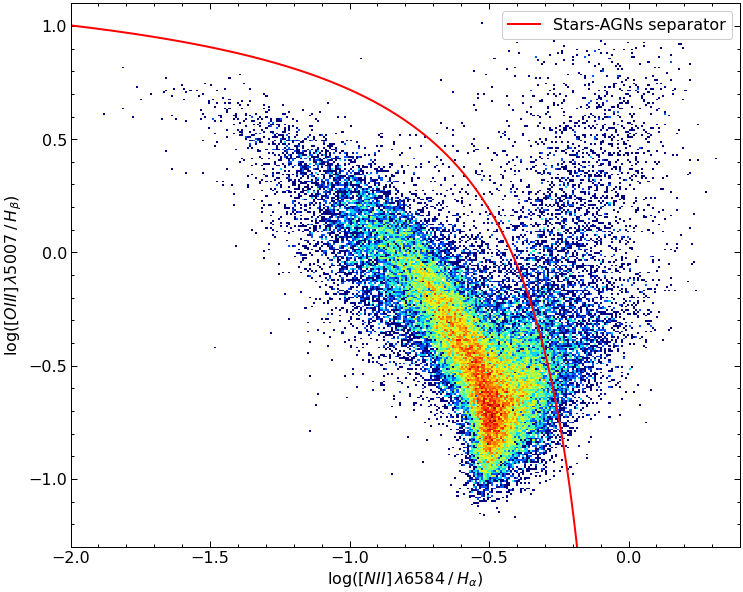

In [172]:
# Data (masked)
plt.figure(figsize=(12, 10))

x_data = np.log10(data['nii_6584_flux'][mask]/data['h_alpha_flux'][mask])
y_data = np.log10(data['oiii_5007_flux'][mask]/data['h_beta_flux'][mask])

binx = np.linspace(np.min(x_data), np.max(x_data), num=300)
biny = np.linspace(np.min(y_data), np.max(y_data), num=300)
hist = plt.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
fig.colorbar(hist[3])

#-------------------------------------------
# Red line
model_r_bound = 0.05 # Analytic bound of the model (divergence point)
x_dense = np.linspace(-2, model_r_bound, int(10000), endpoint=False) 

plt.plot(x_dense, model(x_dense), color='red', label='Stars-AGNs separator')
plt.xlim(-2, 0.4)
plt.ylim(-1.3, 1.1)
plt.xlabel('$\log([NII] \, \lambda6584 \: / \: H_\\alpha)$')
plt.ylabel('$\log([OIII] \, \lambda5007 \: / \: H_\\beta)$')
plt.legend();

In [173]:
# Whether to run this cell or not (it takes a while, but not that much)
run_AGN_counter = False

# Whether to save the results or not
save_results = True

#------------------------------------------------------
if run_AGN_counter:
    # This is a mask on the already masked dataset: raw_data[mask][agn_mask]
    # It (will) select only AGNs, i.e. points (galaxies) above the red line
    agn_mask = np.zeros(len(data['nii_6584_flux'][mask]), dtype=bool)

    # Convert data into numpy arrays, put them into a dictionary and save the keys
    # Don't do this into the cycle because it slows down the computation
    my_data_keys = ['nii_6584_flux', 'h_alpha_flux', 'oiii_5007_flux', 'h_beta_flux']
    my_data = dict(zip(my_data_keys, [np.array(data[key]) for key in my_data_keys]))

    for i in tqdm(range(len(data['nii_6584_flux'][mask]))):
        x_temp = np.log10(my_data['nii_6584_flux'][mask][i]/my_data['h_alpha_flux'][mask][i])
        y_temp = np.log10(my_data['oiii_5007_flux'][mask][i]/my_data['h_beta_flux'][mask][i])
        
        if x_temp>model_r_bound: agn_mask[i]=True
        elif y_temp>model(x_temp): agn_mask[i]=True

    # Save the mask and the agn_mask (since the agn_mask is subordinate to the first mask)
    # One can access the file using np.load()
    if save_results:
        np.savez('SDSS_spectroscopy_masks', mask=mask, agn_mask=agn_mask)

In [174]:
# Be sure the file is updated to the current working frame, otherwise run the cell above and save the file
saved_masks = np.load('SDSS_spectroscopy_masks.npz')
agn_mask = saved_masks['agn_mask']

In [175]:
Nagn = np.sum(agn_mask)
Nstar = len(agn_mask)-Nagn

print('Nagn=', Nagn)
print('Nstar=', Nstar)

Nagn= 5465
Nstar= 43578


x_data = np.log10(data['nii_6584_flux'][mask]/data['h_alpha_flux'][mask])
y_data = np.log10(data['oiii_5007_flux'][mask]/data['h_beta_flux'][mask])
x_min = np.min(x_data)
x_max = np.max(x_data)
xbins = 20
print(len(x_data), len(agn_mask))

#bin_edges = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=xbins+1)
bin_edges = np.linspace(start=(x_min), stop=(x_max), num=xbins+1)

statistics = np.zeros(shape=(int(xbins), 5))

for i in range(int(xbins)):
    mask_bin =((x_data>=bin_edges[i]) & (x_data<bin_edges[i+1]))
    #print(sum(mask_bin))
    indexes = np.where(mask_bin == True)
    agn_bin = agn_mask & mask_bin
    
    #print(sum(agn_bin))
    
    fraction = sum(agn_bin) / sum(mask_bin)
    #print(fraction)
    x_temp = np.array(x_data[mask_bin])
    y_temp = np.array(y_data[mask_bin])
    
    N_temp = int(len(x_temp))
    statistics[i] = np.array([N_temp, 
                              np.mean(x_temp), 
                              np.std(x_temp, ddof=1)/np.sqrt(N_temp), 
                              np.mean(y_temp), 
                              np.std(y_temp, ddof=1)/np.sqrt(N_temp)])


x_data = results['best.stellar.m_star'][mask]
print(x_min, x_max)
x_min=1e7
x_max = np.max(x_data)
xbins = 20
print(len(x_data), len(agn_mask))

bin_edges = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=xbins+1)
#bin_edges = np.logspace(start=(x_min), stop=(x_max), num=xbins+1)

statistics = np.zeros(shape=(int(xbins), 5))
fraction = np.zeros(int(xbins))

for i in range(int(xbins)):
    mask_bin =((x_data>=bin_edges[i]) & (x_data<bin_edges[i+1]))
    print(sum(mask_bin))
    indexes = np.where(mask_bin == True)
    agn_bin = agn_mask & mask_bin
    
    #print(sum(agn_bin))
    
    fraction[i] = sum(agn_bin) / sum(mask_bin)
    #print(fraction[i])
    x_temp = np.array(x_data[mask_bin])
    y_temp = np.array(y_data[mask_bin])
    
    N_temp = int(len(x_temp))
    print(N_temp)
    statistics[i] = np.array([N_temp, 
                              np.mean(x_temp), 
                              np.std(x_temp, ddof=1)/np.sqrt(N_temp), 
                              np.mean(y_temp), 
                              np.std(y_temp, ddof=1)/np.sqrt(N_temp)])


plt.scatter(statistics[:-1,1], fraction[:-1])
plt.xscale("log")

# fraction of agn in function of mass

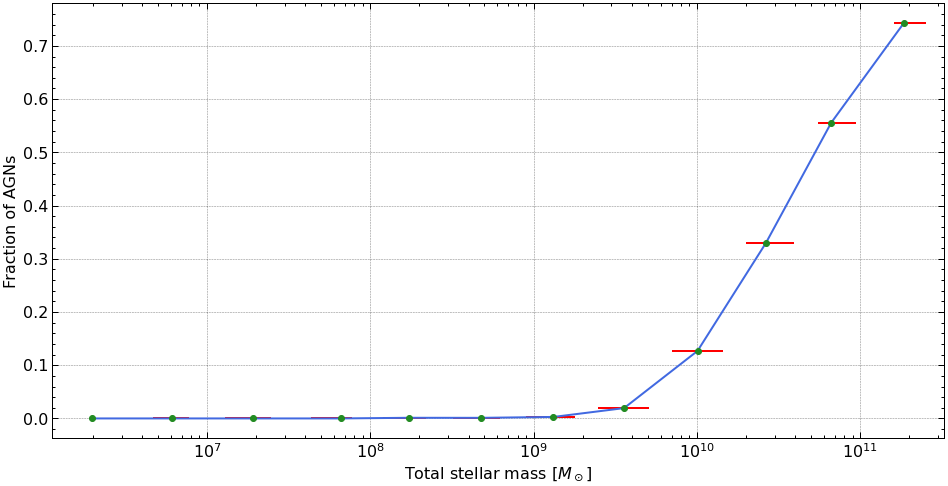

In [176]:
bins_info = Bin_analysis(results['best.stellar.m_star'][mask], agn_mask,
                         xbins=20) # x_min=6e-5
Bin_plotter(bins_info, x_key='quantiles', y_key='qty_frac',
            plt_err=True, err_type='quantiles',
            x_label='Total stellar mass $[M_\odot]$', y_label='Fraction of AGNs',
            markersize=12, linestyle='-',
            ecolor='red', color='royalblue', markerfacecolor='forestgreen', markeredgecolor='forestgreen',
            bad_bins=list(range(8)));

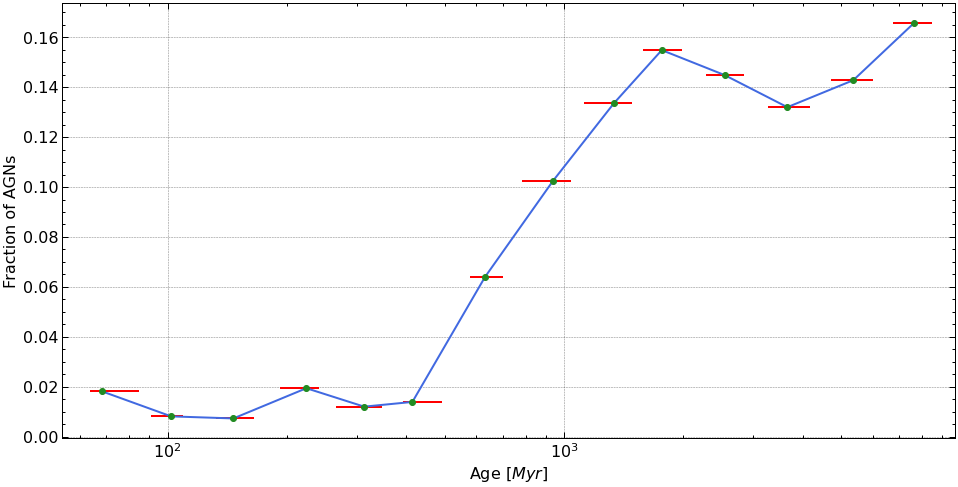

In [177]:
bins_info = Bin_analysis(results['best.stellar.age_m_star'][mask], agn_mask,
                         xbins=20)
Bin_plotter(bins_info, x_key='quantiles', y_key='qty_frac',
            plt_err=True, err_type='quantiles',
            x_label='Age $[Myr]$', y_label='Fraction of AGNs',
            markersize=12, linestyle='-',
            ecolor='red', color='royalblue', markerfacecolor='forestgreen', markeredgecolor='forestgreen',
            bad_bins=list(range(5)) + [len(bins_info) - 1]);

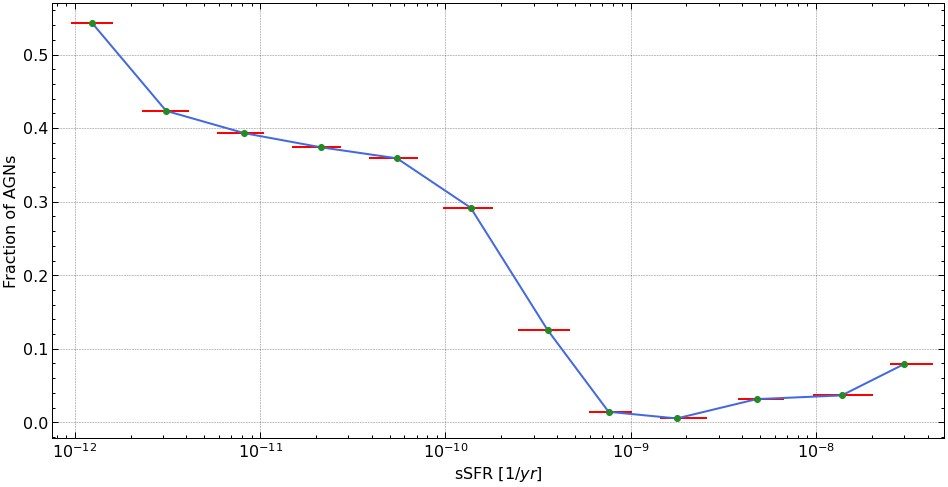

In [178]:
bins_info = Bin_analysis(results['bayes.sfh.sfr10Myrs'][mask] / results['best.stellar.m_star'][mask], agn_mask,
                         xbins=20) # x_min=3e-14
Bin_plotter(bins_info, x_key='quantiles', y_key='qty_frac',
            plt_err=True, err_type='quantiles',
            x_label='sSFR $[1/yr]$', y_label='Fraction of AGNs',
            markersize=12, linestyle='-',
            ecolor='red', color='royalblue', markerfacecolor='forestgreen', markeredgecolor='forestgreen',
            bad_bins=list(range(8)));

Search for relations between properties and agn

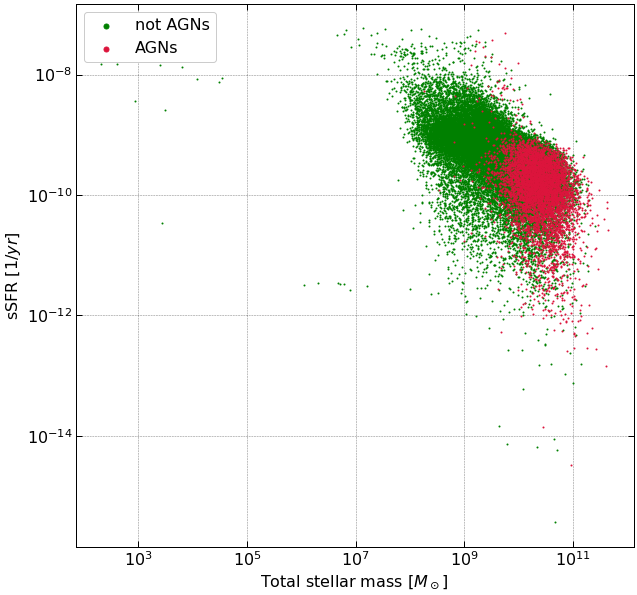

In [179]:
x_data = results['best.stellar.m_star'][mask]
y_data = results['bayes.sfh.sfr10Myrs'][mask]/results['best.stellar.m_star'][mask]

plt.rcParams['figure.figsize'] = [10 , 10]
fig, ax = plt.subplots(1, 1)

ax.scatter(x_data[~agn_mask], y_data[~agn_mask], s=1, color='green', label='not AGNs')
ax.scatter(x_data[agn_mask], y_data[agn_mask], s=1, color='crimson', label='AGNs')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Total stellar mass $[M_\odot]$')
ax.set_ylabel('sSFR $[1/yr]$')

ax.legend(markerscale=5);